In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
listings = pd.read_csv('listings.csv')
pd.set_option('display.max_columns', None)
listings.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200214161839,2020-02-14,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",This is our much-loved family home. We expect ...,NaN,NaN,https://a0.muscache.com/im/pictures/76206750/d...,NaN,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Toronto, Ontario, Canada","I live in Toronto, Canada with my husband and ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1565/profile_...,https://a0.muscache.com/im/users/1565/profile_...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, ON, Canada",Little Portugal,Little Portugal,NaN,Toronto,ON,M6J,Toronto,"Toronto, Canada",CA,Canada,43.64617,-79.42451,f,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",1400.0,$469.00,"$2,000.00",NaN,"$1,000.00",$150.00,1,$0.00,4,730,4,4,730,730,4.0,730.0,25 months ago,t,0,0,0,0,2020-02-14,7,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.13
1,8077,https://www.airbnb.com/rooms/8077,20200214161839,2020-02-15,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,NaN,NaN,NaN,NaN,No smoking please.,NaN,NaN,https://a0.muscache.com/im/pictures/11780344/1...,NaN,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Ontario, Canada",My husband and I have been airbnb host for alm...,within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,2.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Toronto, ON, Canada",Downtown Toronto,Waterfront Communities-The Island,NaN,Toronto,ON,M5J,Toronto,"Toronto, Canada",CA,Canada,43.641

In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23398 entries, 0 to 23397
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 18.9+ MB


In [4]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [5]:
# Columns to drop

drop_cols = ['listing_url','scrape_id','last_scraped',
             'name','summary','space','description', 'experiences_offered','neighborhood_overview', 
             'notes', 'interaction', 'house_rules', 
             'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 
             'host_id', 'host_url', 'host_name', 'host_location','host_about', 
             'host_thumbnail_url','host_picture_url', 'host_verifications', 
             'street', 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'state', 'market', 
             'smart_location', 'country_code', 'country', 'is_location_exact',
             'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
             'calendar_last_scraped', 'license', 'jurisdiction_names']

drop_cols2 = ['host_total_listings_count', 'host_listings_count', 'host_has_profile_pic', 'host_since', 'host_response_time', 'host_response_rate', 
              'host_acceptance_rate', 'host_neighbourhood', 'guests_included', 'bed_type', 'weekly_price', 'monthly_price', 
              'square_feet', 'has_availability', 'number_of_reviews_ltm', 'require_guest_profile_picture', 
              'require_guest_phone_verification', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 
              'requires_license', 'is_business_travel_ready', 'first_review', 'last_review']

reviews_dropcols = ['review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value']

# Columns for consideration

notsure_cols = ['transit', 'access', 'calendar_updated']


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23398 entries, 0 to 23397
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 18.9+ MB


In [7]:
len(drop_cols + drop_cols2 + reviews_dropcols + notsure_cols)

76

In [8]:
keep_cols = ['id', 'host_is_superhost', 'host_identity_verified', 
             'neighbourhood_cleansed', 'latitude','longitude', 
             'property_type', 'room_type', 'accommodates', 'bathrooms','bedrooms', 'beds', 'price', 
             'security_deposit', 'cleaning_fee', 'extra_people', 
             'minimum_nights', 'maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
             'availability_30', 'availability_60', 'availability_90','availability_365',
             'number_of_reviews','review_scores_rating', 'instant_bookable', 'cancellation_policy', 'amenities', 'zipcode']

In [9]:
len(listings[keep_cols].columns)

30

In [10]:
created_cols = ['amenities_score', 'zipcode_cleaned', 'neighbourhood_listing_total']

In [11]:
# Drop the columns not used
listings.drop(drop_cols + drop_cols2 + notsure_cols + reviews_dropcols, axis = 1,inplace=True)

In [12]:
total = listings.notnull().sum().sum()
null = listings.isnull().sum().sum()
nonNull = total -  null
print('Total data entries: ', total)
print('Number of null entries: ', null)
print('Total number of non-null entries: ', nonNull)

Total data entries:  687690
Number of null entries:  14250
Total number of non-null entries:  673440


In [13]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23398 entries, 0 to 23397
Data columns (total 30 columns):
id                        23398 non-null int64
host_is_superhost         23395 non-null object
host_identity_verified    23395 non-null object
neighbourhood_cleansed    23398 non-null object
zipcode                   23023 non-null object
latitude                  23398 non-null float64
longitude                 23398 non-null float64
property_type             23398 non-null object
room_type                 23398 non-null object
accommodates              23398 non-null int64
bathrooms                 23389 non-null float64
bedrooms                  23372 non-null float64
beds                      23245 non-null float64
amenities                 23398 non-null object
price                     23398 non-null object
security_deposit          17960 non-null object
cleaning_fee              19822 non-null object
extra_people              23398 non-null object
minimum_nights          

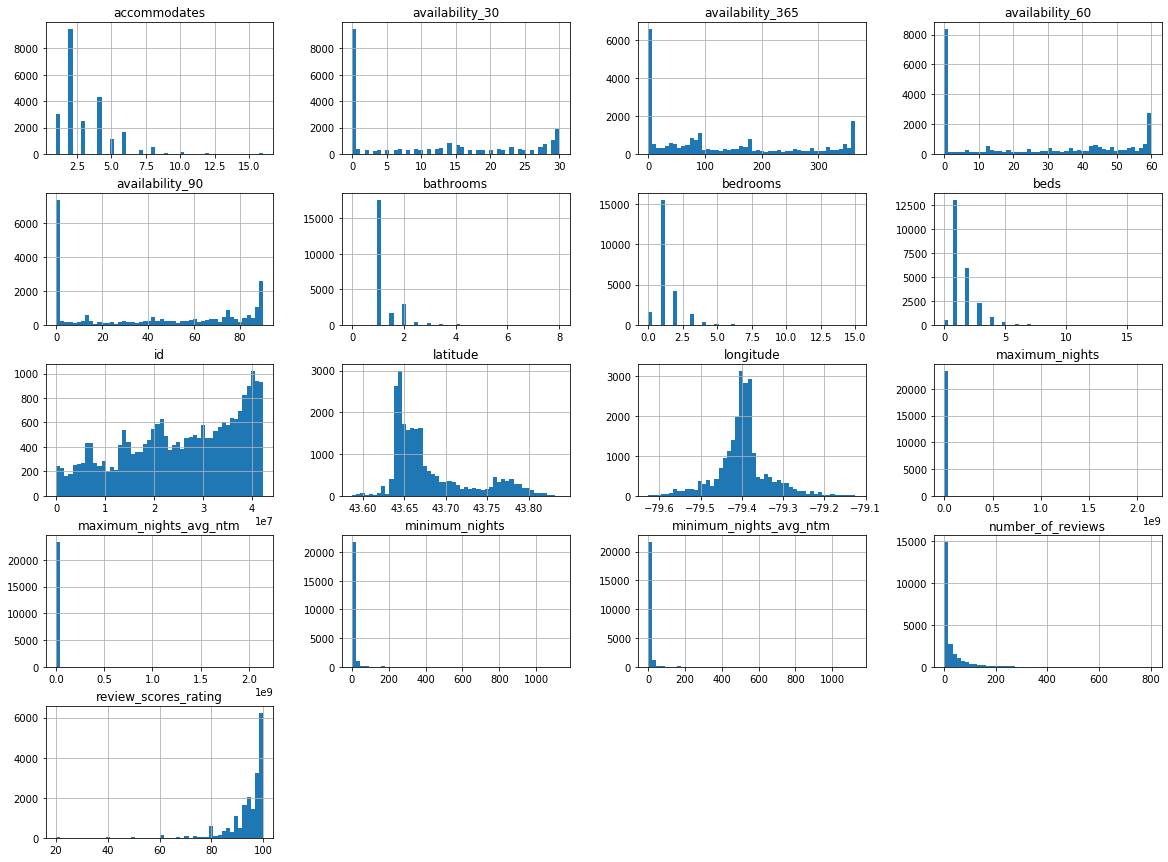

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
listings.hist(bins=50, figsize=(20,15))
plt.title('Histrogram Plots of Attributes')
plt.show();

In [15]:
cols_missing = listings.columns[listings.isnull().mean() > 0.2] #columns with 20% of data missing
print(set(cols_missing), 'has more than 20% of data missing')

{'security_deposit'} has more than 20% of data missing


### Data Cleaning

In [16]:
# Remove '$' on amounts

cols_with_str = ['price', 'cleaning_fee', 'security_deposit', 'extra_people']
               
for col in cols_with_str:
    listings[col] = listings[col].str.replace("\$|,",'').astype(float)

In [17]:
# zipcode

listings['zipcode_cleaned'] = listings['zipcode'].astype(str).str[0:2]
listings['zipcode_cleaned'] = listings['zipcode_cleaned'].apply(lambda x: x.upper())

# drop "zipcode" from original df listings
listings.drop('zipcode', axis = 1, inplace = True)

In [18]:
listings['zipcode_cleaned'].nunique()

24

In [19]:
# Create 'neighbourhood_listing_total' from 'neighbourhood_cleansed'
listings['neighbourhood_listing_total'] = listings.groupby('neighbourhood_cleansed')['neighbourhood_cleansed'].transform('count')
# Drop 'neighbourhood_cleansed'
listings.drop('neighbourhood_cleansed', axis =1, inplace = True)

In [20]:
listings.groupby('property_type').size().sort_values(ascending = False)

property_type
Apartment                 6668
Condominium               6603
House                     6256
Townhouse                 1031
Guest suite                997
Bungalow                   829
Loft                       440
Guesthouse                 122
Villa                      106
Serviced apartment          99
Boutique hotel              66
Other                       42
Bed and breakfast           42
Hostel                      21
Hotel                       15
Tiny house                  13
Barn                        11
Aparthotel                   7
Cottage                      7
Boat                         5
Camper/RV                    4
Cave                         3
Casa particular (Cuba)       2
Farm stay                    2
Castle                       1
Cabin                        1
Dome house                   1
Train                        1
Parking Space                1
Resort                       1
Earth house                  1
dtype: int64

In [21]:
# Remove rows with property_type not included in top 9

top_9 = ['Apartment', 'Condominium', 'House', 'Townhouse', 'Guest suite', 'Bungalow', 'Loft', 'Guesthouse']
listings.drop(listings.loc[~listings.property_type.isin(top_9)].index, inplace=True)

In [22]:
listings.groupby('property_type').size().sort_values(ascending = False)

property_type
Apartment      6668
Condominium    6603
House          6256
Townhouse      1031
Guest suite     997
Bungalow        829
Loft            440
Guesthouse      122
dtype: int64

In [23]:
# Fill missing values for security_deposit with 0.0
listings['security_deposit'].fillna(0.0, inplace=True)

In [24]:
# Fill missing values for cat_features with 'f'
listings['host_is_superhost'].fillna('f', inplace = True) 
listings['host_identity_verified'].fillna('f', inplace = True)

### Feature Engineering

In [25]:
listings['amenities'].nunique()

21509

Amenities has 21883 unique values. This needs to be reduced so create a new feature "amenities_score"

In [26]:
#create a new dataframe to store features in amentities column

amenities_list = list(listings.amenities)
amm_pd = pd.DataFrame(listings.index,columns=['id'])
i = 0
total_rows = amm_pd['id'].count()

for row in amenities_list:
    row_cleaned = row.replace('{', '').replace('}','').replace('"','')
    feature_list = row_cleaned.split(',')
    for feature in feature_list:
        if feature in amm_pd.columns:
            amm_pd.at[i,feature] = 1
        else:
            amm_pd[feature] = pd.Series(np.zeros(total_rows))
            amm_pd.at[i,feature] = 1
    i+=1
    
amm_pd.head(2)

,id,TV,Internet,Wifi,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,First aid kit,Fire extinguisher,Essentials,Shampoo,Cable TV,Pool,Free parking on premises,Doorman,Gym,Elevator,Buzzer/wireless intercom,Pets live on this property,Cat(s),Free street parking,Carbon monoxide detector,Lock on bedroom door,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,Self check-in,Keypad,Private entrance,Hot water,Bed linens,Extra pillows and blankets,Pocket wifi,Microwave,Coffee maker,Refrigerator,Dishes and silverware,Cooking basics,Oven,Stove,Long term stays allowed,Wheelchair accessible,Pets allowed,Building staff,Dishwasher,Single level home,Patio or balcony,Luggage dropoff allowed,Paid parking on premises,Dog(s),Host greets you,Lockbox,Changing table,High chair,Children’s books and toys,Children’s dinnerware,Garden or backyard,Cleaning before checkout,Paid parking off premises,Private living room,Breakfast,Hot tub,Other,Safety card,Bathtub,BBQ grill,Room-darkening shades,Game console,Lake access,Pack ’n Play/travel crib,Ethernet connection,Waterfront,Smart lock,Smoking allowed,Barbecue utensils,Trash can,Washer/Dryer,Suitable for events,Baby bath,Babysitter recommendations,Crib,Baking sheet,Outlet covers,Handheld shower head,Shower gel,Stair gates,Beachfront,Firm mattress,Body soap,Bath towel,Toilet paper,Rain shower,Gas oven,Breakfast table,Formal dining area,Soaking tub,Walk-in shower,Full kitchen,Bedroom comforts,Bathroom essentials,Fireplace guards,,Heated floors,EV charger,Other pet(s),Wide entrance for guests,Well-lit path to entrance,No stairs or steps to enter,Wide hallways,Flat path to guest entrance,Wide entryway,Hot water kettle,Smart TV,Sound system,Espresso machine,Netflix,Murphy bed,Fixed grab bars for toilet,Baby monitor,Disabled parking spot,Accessible-height bed,Wide entrance,Wide doorway to guest bathroom,Accessible-height toilet,Ceiling fan,Mini fridge,Balcony,Sun loungers,Shared gym,Steam oven,Convection oven,HBO GO,Memory foam mattress,High-resolution computer monitor,Central air conditioning,Beach essentials,Bread maker,DVD player,Terrace,Standing valet,En suite bathroom,Outdoor seating,Window guards,Extra space around bed,Wide clearance to shower,toilet,Printer,Amazon Echo,Pillow-top mattress,Fax machine,Mudroom,Fire pit,Exercise equipment,Private hot tub,Shared hot tub,Outdoor parking,Heated towel rack,Double oven,Jetted tub,Projector and screen,Kitchenette,Table corner guards,Fixed grab bars for shower,Outdoor kitchen,Warming drawer,Beach view,Wine cooler,Day bed,Bidet,Shared pool,Touchless faucets,Stand alone steam shower,Air purifier,Mountain view,Sauna,Tennis court,Pool toys,Private pool,Step-free shower,Private bathroom,Private gym,Ground floor access,Pool cover,Alfresco bathtub,Heat lamps,Ski-in/Ski-out,Pool with pool hoist
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [27]:
amm_pd.shape

(22946, 196)

In [28]:
# remove features that are either very frequent (>80%), or very infrequenct (<20%)

infrequent_amenities = []
for col in amm_pd.iloc[:,1:].columns:
    if amm_pd[col].sum() < len(amm_pd)/5:
        infrequent_amenities.append(col)
    if amm_pd[col].sum() > len(amm_pd)*0.8:
        infrequent_amenities.append(col)
print(infrequent_amenities)

['Internet', 'Wifi', 'Air conditioning', 'Kitchen', 'Indoor fireplace', 'Heating', 'Washer', 'Dryer', 'Smoke detector', 'Essentials', 'Pool', 'Doorman', 'Buzzer/wireless intercom', 'Pets live on this property', 'Cat(s)', 'Free street parking', 'Carbon monoxide detector', '24-hour check-in', 'Hangers', 'translation missing: en.hosting_amenity_49', 'translation missing: en.hosting_amenity_50', 'Keypad', 'Pocket wifi', 'Wheelchair accessible', 'Pets allowed', 'Building staff', 'Single level home', 'Luggage dropoff allowed', 'Paid parking on premises', 'Dog(s)', 'Host greets you', 'Lockbox', 'Changing table', 'High chair', 'Children’s books and toys', 'Children’s dinnerware', 'Garden or backyard', 'Cleaning before checkout', 'Private living room', 'Breakfast', 'Hot tub', 'Other', 'Safety card', 'Bathtub', 'BBQ grill', 'Room-darkening shades', 'Game console', 'Lake access', 'Pack ’n Play/travel crib', 'Ethernet connection', 'Waterfront', 'Smart lock', 'Smoking allowed', 'Barbecue utensils',

In [29]:
amm_pd.drop(infrequent_amenities, axis=1, inplace=True)

In [30]:
amm_pd.shape #23398

(22946, 30)

In [31]:
amm_pd['sum'] = amm_pd.drop('id', axis = 1).sum(axis=1)

In [32]:
# add the new column to the original listings df, then drop the "amenities" feature
listings['amenities_score'] = amm_pd['sum'] 
listings.drop('amenities', axis = 1, inplace = True)

### Check for features that are highly correlated

In [33]:
len(listings.columns)

30

In [34]:
target = ['price']
cat_features = ['host_is_superhost', 'host_identity_verified',
               'property_type', 'room_type', 'instant_bookable', 
                'cancellation_policy', 'zipcode_cleaned' ]  


In [35]:
df = listings.drop(cat_features, axis=1)
corr = df.corr()

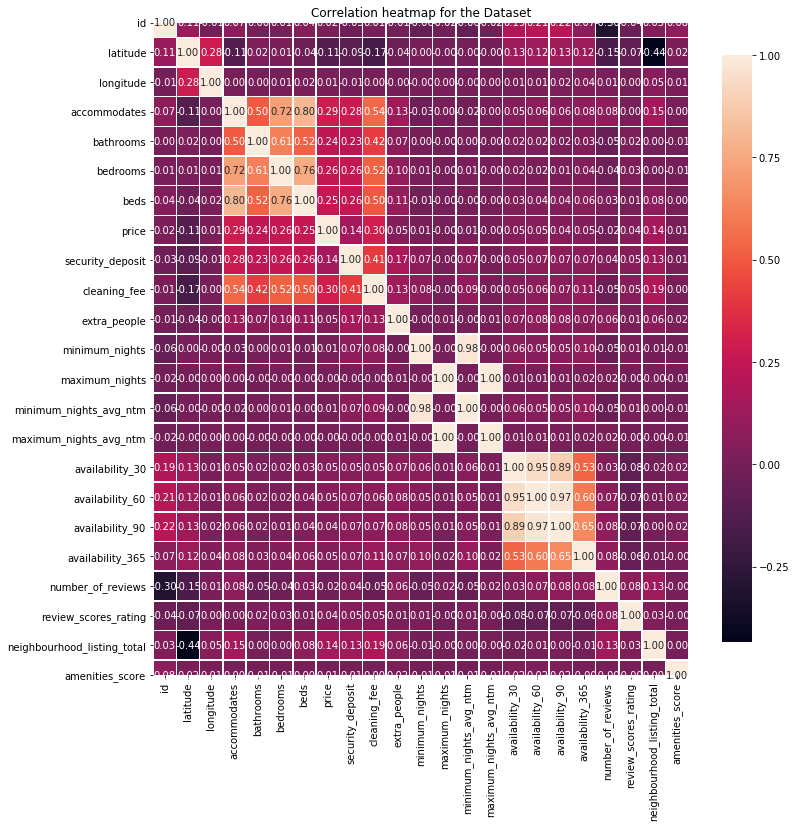

In [36]:
#Check for correlation between features

def correlation_heatmap(corr):
    fig, ax = plt.subplots(figsize=(12, 12))   
    sns.heatmap(corr, linewidth = 0.5, fmt = '0.2f', linewidths=.5, annot=True, cbar_kws={"shrink": .90})
    plt.title('Correlation heatmap for the Dataset')
    plt.show();
    
correlation_heatmap(corr)   

In [37]:
# Select only columns which meet the threshold

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
            
selected_columns = df.columns[columns]
df_corr = df[selected_columns]

In [38]:
print("Features dropped based on correlation > threshold: ")
corr_features=[]
for i in range(len(df.columns)):
    if df.columns[i] not in df_corr.columns:
        print( df.columns[i])
        corr_features.append(df.columns[i])

Features dropped based on correlation > threshold: 
minimum_nights_avg_ntm
maximum_nights_avg_ntm
availability_60
availability_90


In [39]:
listings.drop(corr_features, axis=1, inplace = True)

In [144]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22946 entries, 0 to 23397
Data columns (total 25 columns):
host_is_superhost              22946 non-null object
host_identity_verified         22946 non-null object
latitude                       22946 non-null float64
longitude                      22946 non-null float64
property_type                  22946 non-null object
room_type                      22946 non-null object
accommodates                   22946 non-null int64
bathrooms                      22939 non-null float64
bedrooms                       22922 non-null float64
beds                           22801 non-null float64
price                          22946 non-null float64
security_deposit               22946 non-null float64
cleaning_fee                   19492 non-null float64
extra_people                   22946 non-null float64
minimum_nights                 22946 non-null int64
maximum_nights                 22946 non-null int64
availability_30                22946 

In [41]:
#drop id
listings.drop('id', axis = 1, inplace = True)

In [145]:
# all  numerical features

num_features = ['latitude', 'longitude', 'accommodates', 
                'bathrooms', 'bedrooms', 'beds',
                'cleaning_fee', 'extra_people', 'security_deposit', 
                'minimum_nights', 'maximum_nights', 
                'availability_30', 'availability_365',
                'number_of_reviews', 'review_scores_rating',
                'amenities_score', 'neighbourhood_listing_total']  

In [146]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(listings, test_size=0.3, random_state=100)
print('Train set:', train_set.shape)
print('Test set:', test_set.shape)

Train set: (16062, 25)
Test set: (6884, 25)


In [179]:
X_train = train_set.drop('price', axis = 1)
y_train = train_set['price']
X_test = test_set.drop('price', axis = 1)
y_test = test_set['price']

In [196]:
# Create a pipeline for numerical features
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Create a pipeline that only one hot encodes categorical features
numercial_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_features)
#        ("cat", OneHotEncoder(), cat_features),
    ])

In [197]:
# Create the final input arrays for modeling

X_train_prepared = numercial_pipeline.fit_transform(X_train)



In [198]:
X_train_prepared_df = pd.DataFrame(data = X_train_prepared)
X_train_prepared_df.shape

(16062, 17)

In [199]:
from sklearn.decomposition import PCA

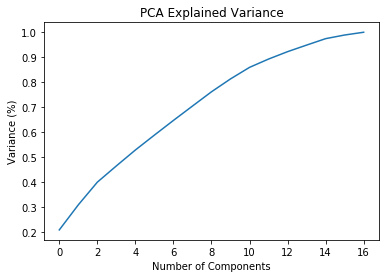

In [200]:
#Fitting the PCA algorithm with our Data
pca_g = PCA().fit(X_train_prepared)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca_g.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('PCA Explained Variance')
plt.show()


In [201]:

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train_prepared)

In [202]:
pca_df = pd.DataFrame(data = X_train_reduced)
pca_df.shape

(16062, 15)

In [203]:
1 - pca.explained_variance_ratio_.sum()

0.025646408410113786

In [204]:
pca.components_

array([[-6.85625812e-02,  3.77395188e-03,  4.59771030e-01,
         3.67573257e-01,  4.53982878e-01,  4.57557582e-01,
         3.78983576e-01,  1.09307815e-01,  2.46952421e-01,
         1.04427982e-02, -4.49215061e-04,  4.13419590e-02,
         6.32881032e-02,  2.22477623e-02,  1.91997116e-02,
        -2.58536752e-04,  1.00380952e-01],
       [ 5.33892164e-01,  2.16827066e-01, -2.26625708e-02,
         5.88598051e-02,  5.09740766e-02,  2.43015573e-02,
        -4.18347687e-02,  2.92894570e-02, -2.87913039e-02,
         1.19160875e-01,  1.15776924e-02,  4.89990114e-01,
         4.85812966e-01, -1.05625391e-01, -1.29020793e-01,
         2.77127581e-02, -3.71930420e-01],
       [-3.62356017e-01, -1.14239266e-01, -3.25343142e-02,
        -2.03238890e-01, -1.93383788e-01, -1.16539538e-01,
         1.06917193e-01,  2.15946758e-01,  1.91266899e-01,
         1.06759294e-01,  3.56746551e-02,  4.18967511e-01,
         4.40959979e-01,  3.36580935e-01, -1.81167450e-02,
         1.05361292e-02,  4.1

In [205]:
# Recalculate dataset using PCA model inverse transformation
X_train_prepared_inv = pca.inverse_transform(X_train_reduced)


In [209]:
print(pd.DataFrame(data = X_train_prepared_inv).shape)

(16062, 17)


In [210]:
print(pd.DataFrame(data = X_train_prepared).shape)


(16062, 17)


In [211]:
# compute reconstruction error
np.mean(np.sum(np.square(X_train_prepared_inv - X_train_prepared), axis=1))

0.43598894297193685